# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in the suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxide concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


Let' import the data first and have an initial look at it...

In [1]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print("Shape of matrix is {}".format(df.shape))

Shape of matrix is (506, 14)


In [2]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Now let's consider partitioning the data into 3 different two-way splits as suggested...

## Split 1: Properties next and not next to Charles River

I chose this split for no other reason than because it was suggested.  But, without yet looking at the data I am betting nitrogen oxide concentration (parts per 10 million) will differ between the two splits significantly.

### Centrality/Disbursion

#### Properties next to Charles River

In [3]:
df_props_next_to_chas = df.loc[df['CHAS']==1]
df_props_next_to_chas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


#### Properties NOT next to Charles River

In [4]:
df_props_not_next_to_chas = df.loc[df['CHAS']==0]
df_props_not_next_to_chas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3.744447,11.634820,11.019193,0.0,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461040,12.757941,22.093843
std,8.876818,23.617979,6.913850,0.0,0.113102,0.685895,28.458924,2.145567,8.748452,168.853790,2.155958,93.423542,7.169271,8.831362
min,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.079640,0.000000,5.040000,0.0,0.448000,5.882000,42.500000,2.105250,4.000000,282.500000,17.400000,375.365000,7.160000,16.600000
50%,0.245220,0.000000,8.560000,0.0,0.538000,6.202000,76.500000,3.215700,5.000000,330.000000,19.100000,391.830000,11.380000,20.900000
75%,3.695030,12.500000,18.100000,0.0,0.624000,6.594000,94.100000,5.287300,24.000000,666.000000,20.200000,396.375000,17.095000,24.800000
max,88.976200,100.000000,27.740000,0.0,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Side-by-side displots (of each metric) of both for comparison

//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


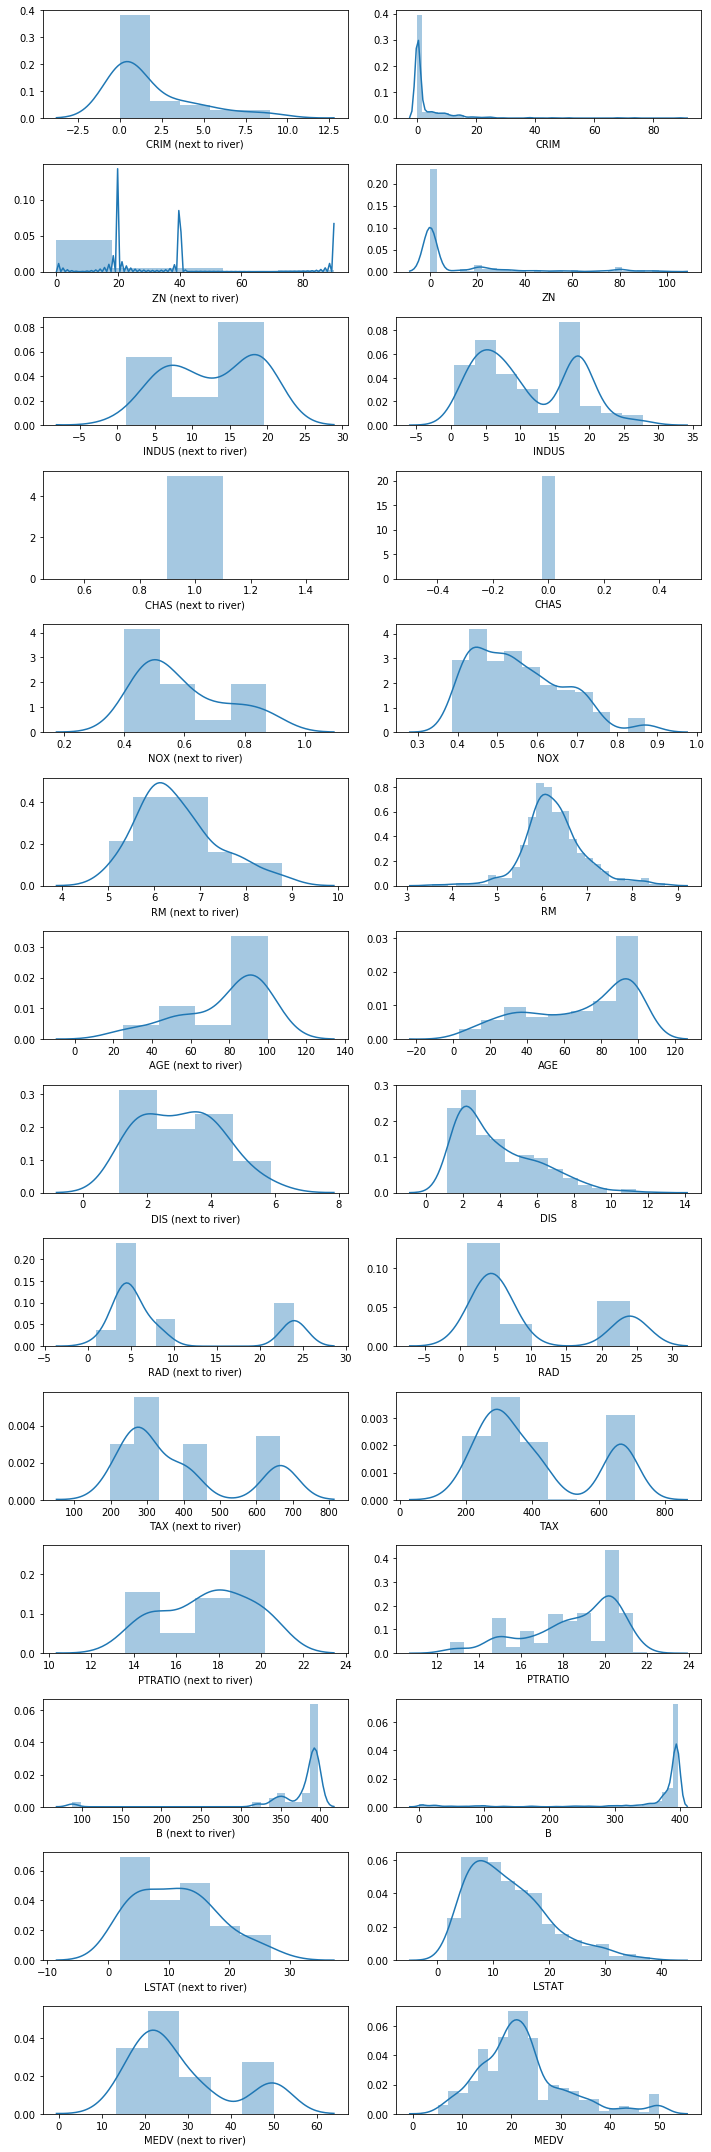

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def distplot_compare(df_pos, df_neg, qual_short_desc):
    if df_pos.columns.all() == df_neg.columns.all():
        index = 0
        fig, axs = plt.subplots(ncols=2, nrows=len(df_pos.columns), figsize=(10, 30))        
        axs = axs.flatten()
        for attr in df_pos.columns:
            v1 = df_pos[attr]
            v2 = df_neg[attr]
            sns.distplot(v1, ax=axs[index], axlabel=attr+" ("+qual_short_desc+")") 
            sns.distplot(v2, ax=axs[index+1])
            index += 2
        plt.tight_layout()
    else:
        print("Dataframes do not have same columns!")

distplot_compare(df_props_next_to_chas, df_props_not_next_to_chas, "next to river")

#### Analysis based on displot comparison
<ol>
    <li>CRIM: the point is that for properties bounding the river, there are fewer outliers making statistical measures of crime rate evidently more predictable</li>
    <li>RM: The distribution is more normal for properties not bounding the river.  The implication here may be that homes bounding the river may tend to be "customized" relative to those not next to the river.</li>
    <li>DIS: distances to five Boston employment centers for home next to the river tend to be more concentrated closer relative to those that are not bounded by the river.</li>
    <li>MEDV: The distribution for this metric is a bit more normal in the case of homes not bounded the river.  The implication here is that possibly more homes above MEDV are bound by the river.</li>
    <li>There are no metrics that really stand out noticably.  These observations are somewhat contrived as a result and should not be taken under heavy consideration.</li>
</ol>

### Scattermatrix plots for comparison

#### Properties next to Charles River

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


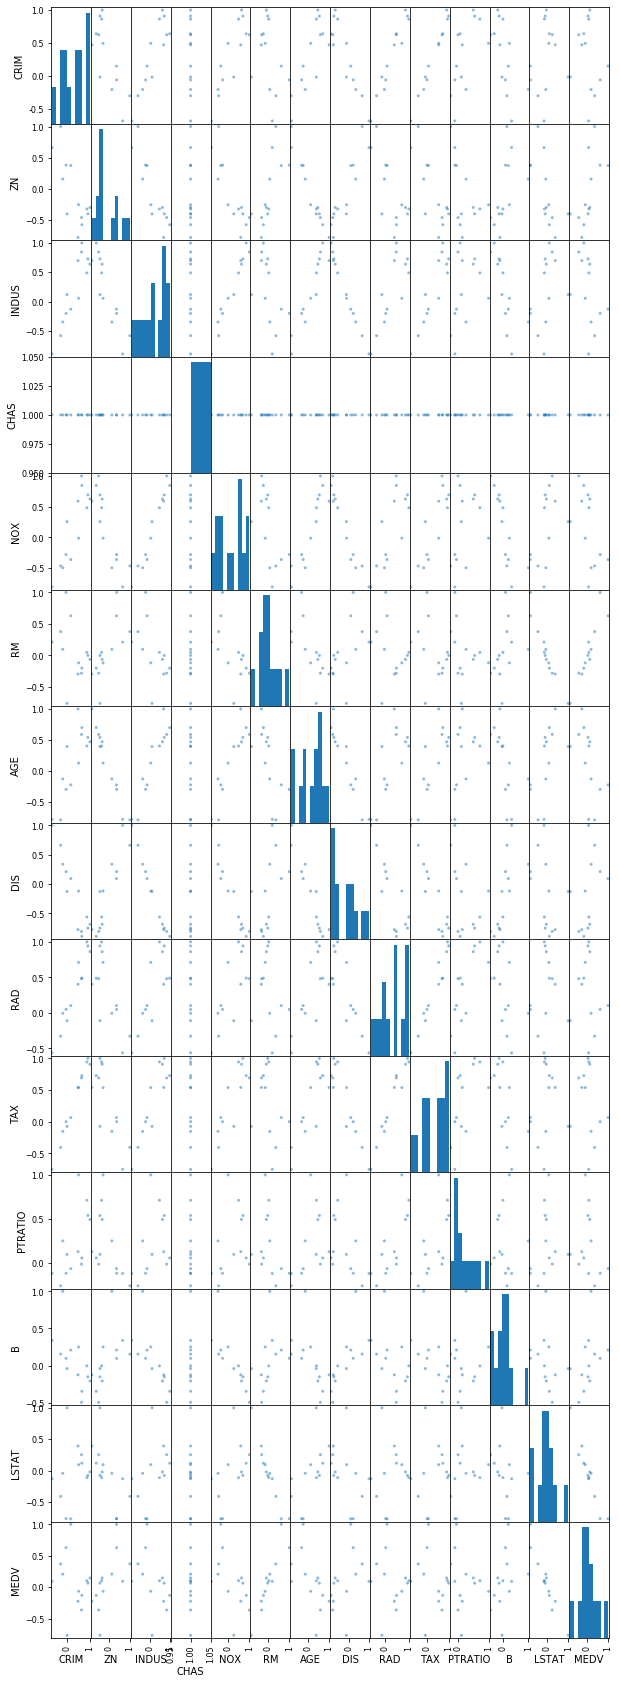

In [6]:
def plot_scatter_matrix(df):
    dfCorr = df.corr()
    dfCorr.CHAS = 1
    return pd.plotting.scatter_matrix(dfCorr, figsize=(10,30))
    
fig = plot_scatter_matrix(df_props_next_to_chas)

#### Correlations based on scatter matrix for properties next to Charles River
<ol>
    <li>CRIM $\propto$ RAD, TAX</li>
    <li>ZN $\propto$ -AGE, DIS</li>
    <li>INDUS $\propto$ NOX, AGE, -DIS</li>
    <li>NOX $\propto$ -ZN, INDUS, AGE, -DIS</li>
    <li>RM $\propto$ -LSTAT, MEDV</li>
    <li>AGE $\propto$ -ZN, INDUS, NOX</li>
    <li>DIS $\propto$ -INDUS, -NOX</li>
    <li>RAD $\propto$ CRIM, TAX</li>
    <li>TAX $\propto$ CRIM, INDUS, RAD</li>
    <li>LSTAT $\propto$ -RM, -MDEV</li>
    <li>MDEV $\propto$ RM, -LSTAT</li>
</ol>

#### Properties NOT next to Charles River

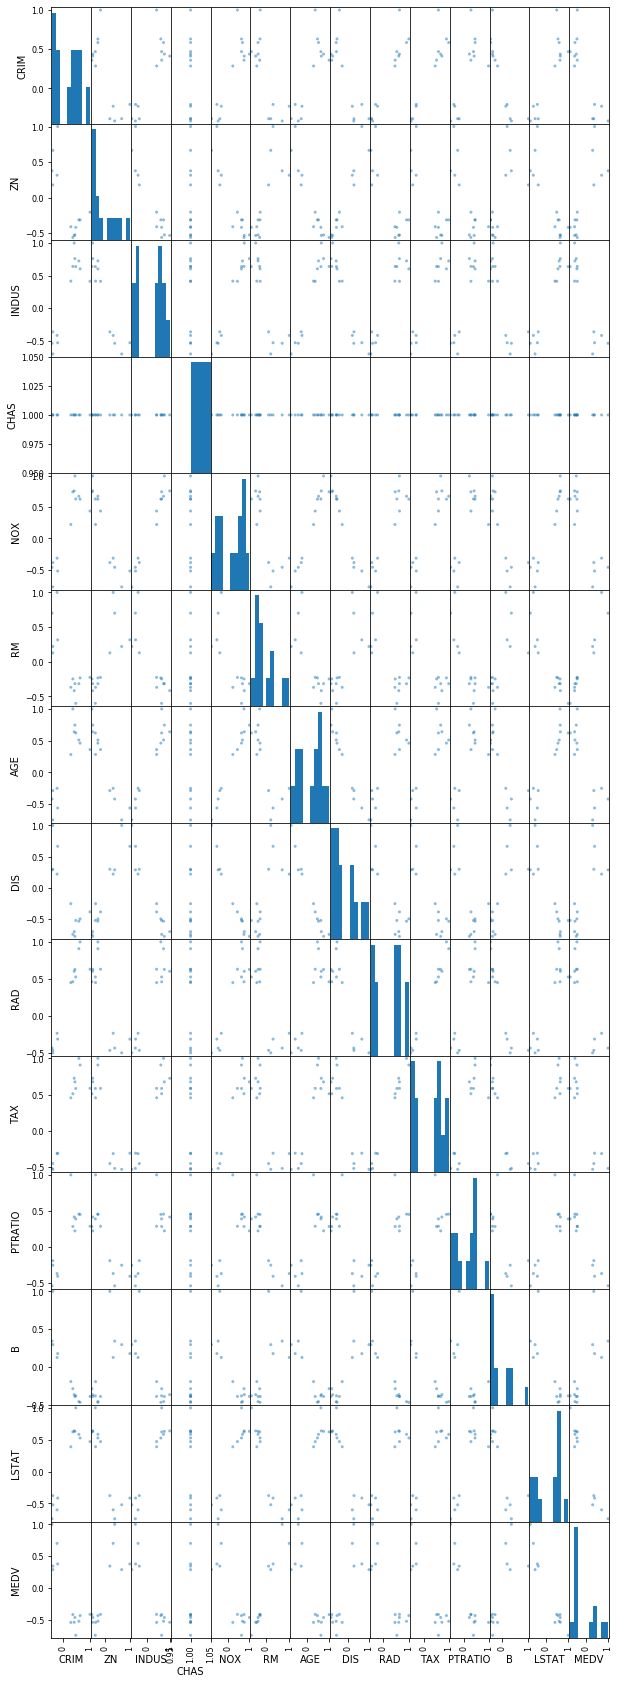

In [7]:
fig = plot_scatter_matrix(df_props_not_next_to_chas)

#### Correlations based on scatter matrix for properties NOT next to Charles River
<ol>
    <li>ZN $\propto$ -INDUS, RM, -AGE, DIS</li>
</ol>

## Split 2: Crime Rate above and less-than-or-equal to median

I chose this split for no other reason than because it was suggested.  But, also without yet looking at the data I am betting age and possibly ptratio will differ between the two splits significantly.

### Centrality/Disbursion

#### Properties with Crime Rate above median

In [8]:
df_cr_gt_med = df.loc[df['CRIM']>df.CRIM.median()]
df_cr_gt_med.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,7.131476,1.201581,15.271265,0.086957,0.638419,6.174874,85.839526,2.498489,14.940711,510.731225,19.003953,324.641976,15.886640,20.116206
std,11.109123,4.798611,5.439010,0.282330,0.098704,0.810138,17.874235,1.085521,9.529843,167.855282,2.346947,118.830838,7.546922,10.270362
min,0.259150,0.000000,3.970000,0.000000,0.431000,3.561000,8.400000,1.129600,2.000000,188.000000,13.000000,0.320000,1.730000,5.000000
25%,0.671910,0.000000,9.900000,0.000000,0.544000,5.757000,81.800000,1.752300,5.000000,307.000000,18.400000,329.460000,10.580000,13.600000
50%,3.678220,0.000000,18.100000,0.000000,0.624000,6.129000,92.400000,2.139800,24.000000,666.000000,20.200000,383.320000,15.170000,17.900000
75%,9.329090,0.000000,18.100000,0.000000,0.700000,6.471000,97.900000,3.048000,24.000000,666.000000,20.200000,395.110000,20.340000,23.000000
max,88.976200,22.000000,25.650000,1.000000,0.871000,8.780000,100.000000,8.906700,24.000000,666.000000,21.200000,396.900000,37.970000,50.000000


#### Properties with Crime Rate less-than-or-equal to median

In [9]:
df_cr_lte_med = df.loc[df['CRIM']<=df.CRIM.median()]
df_cr_lte_med.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.095572,21.525692,7.002292,0.051383,0.470971,6.394395,51.310277,5.091596,4.158103,305.743083,17.907115,388.706087,9.419486,24.949407
std,0.062818,29.319808,5.514454,0.221216,0.055598,0.555686,25.881899,2.081304,1.659121,87.483701,1.811216,22.837744,4.923497,7.232047
min,0.006320,0.000000,0.460000,0.000000,0.385000,5.093000,2.900000,1.668600,1.000000,187.000000,12.600000,70.800000,1.980000,7.000000
25%,0.044620,0.000000,3.370000,0.000000,0.431000,5.983000,31.500000,3.370000,3.000000,247.000000,16.600000,389.150000,5.770000,20.300000
50%,0.081990,0.000000,5.640000,0.000000,0.449000,6.310000,48.500000,5.116700,4.000000,287.000000,18.000000,393.680000,8.510000,23.100000
75%,0.135870,34.000000,8.560000,0.000000,0.515000,6.727000,71.900000,6.479800,5.000000,345.000000,19.100000,396.900000,12.330000,28.500000
max,0.253870,100.000000,27.740000,1.000000,0.624000,8.069000,100.000000,12.126500,8.000000,711.000000,22.000000,396.900000,30.810000,50.000000


### Side-by-side displots (of each metric) of both for comparison

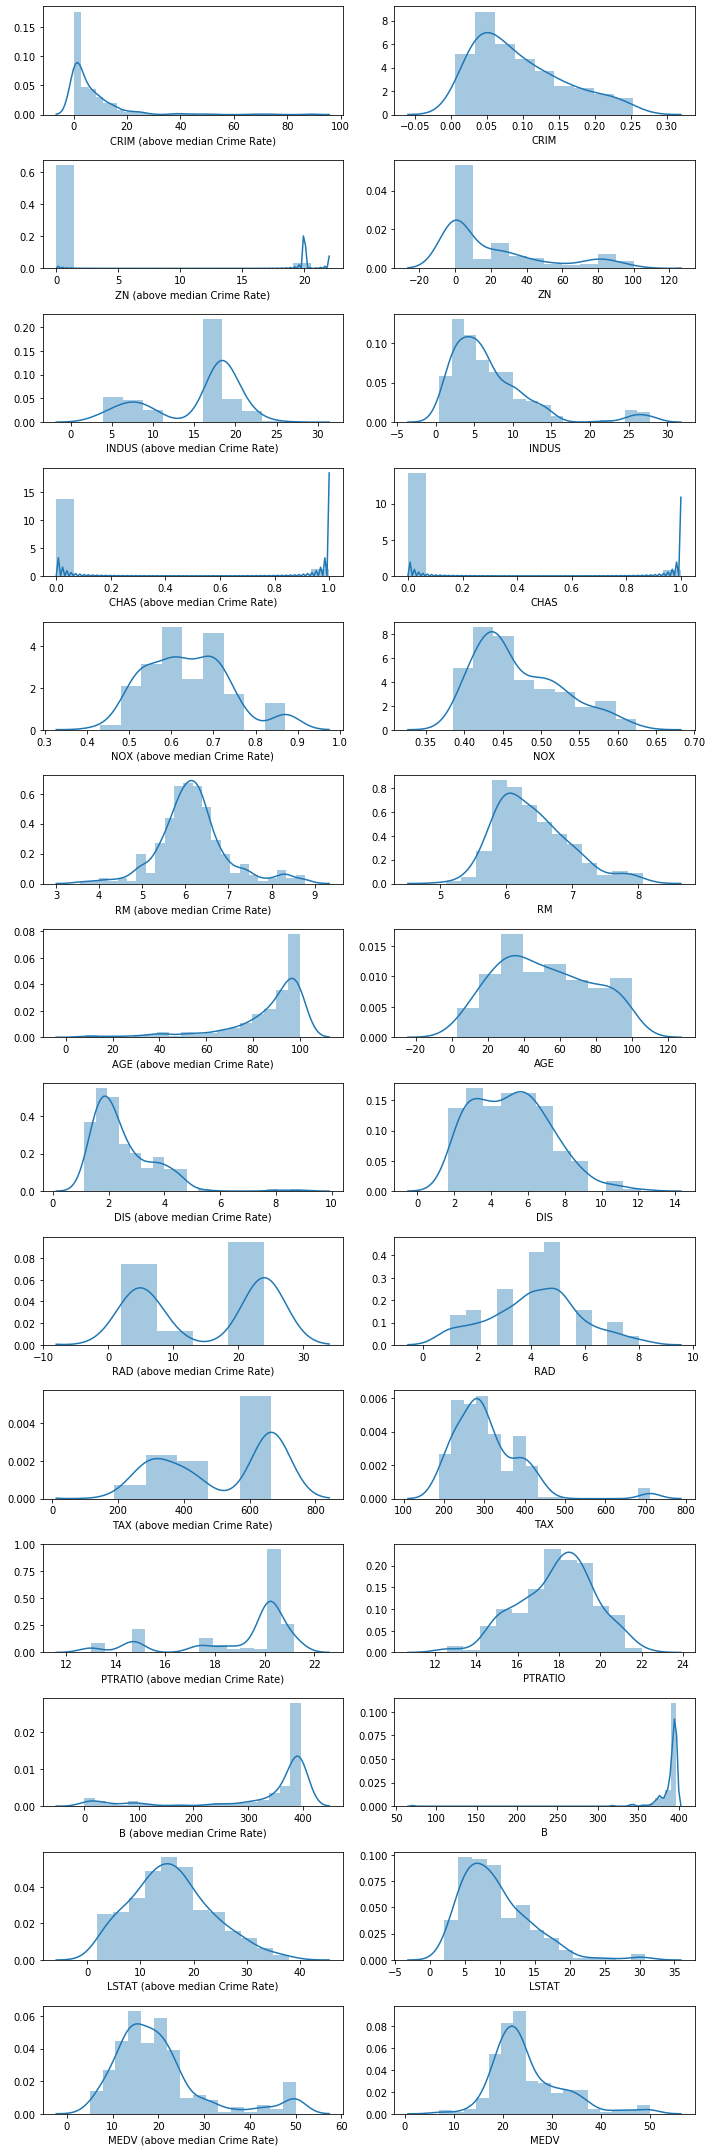

In [10]:
distplot_compare(df_cr_gt_med, df_cr_lte_med, "above median Crime Rate")

#### Analysis based on displot comparison
<ol>
    <li>CRIM: observation goes against intution in the case of CRIM above median in that the distribution is heavily skewed closer to 0 than for the split based on CRIM less than or equal to median.</li>
    <li>ZN: Also counter-intuitively, for the split for CRIM above the median, ZN has a similar distribution but it is even more pronounced in that there central tendancy for ZN is heavily skewed toward 0.  So, it is more likely for less crime to occur in areas where proportionally more of residential land zoned for lots over 25,000 sq.ft occurs?</li>
    <li>INDUS: The distributions are not particularly uniform for either split and actually appear to be similar.  Not much useful info, here.</li>
    <li>AGE: This is the most suprising reveal in that the distribution of AGE for CRIM over median is heavily skewed toward 100! What?!  For CRIM less than emdian, the distribution is more normal.</li>
    <li>PTRAION exhibits interesting distributions for these splits, as well.  The distribution appears to be more or less normal for CRIM less than or equal to median but does not seem to be very telling for the CRIM above median split.</li>
</ol>

### Scattermatrix plots for comparison

#### Properties with Crime Rate above median

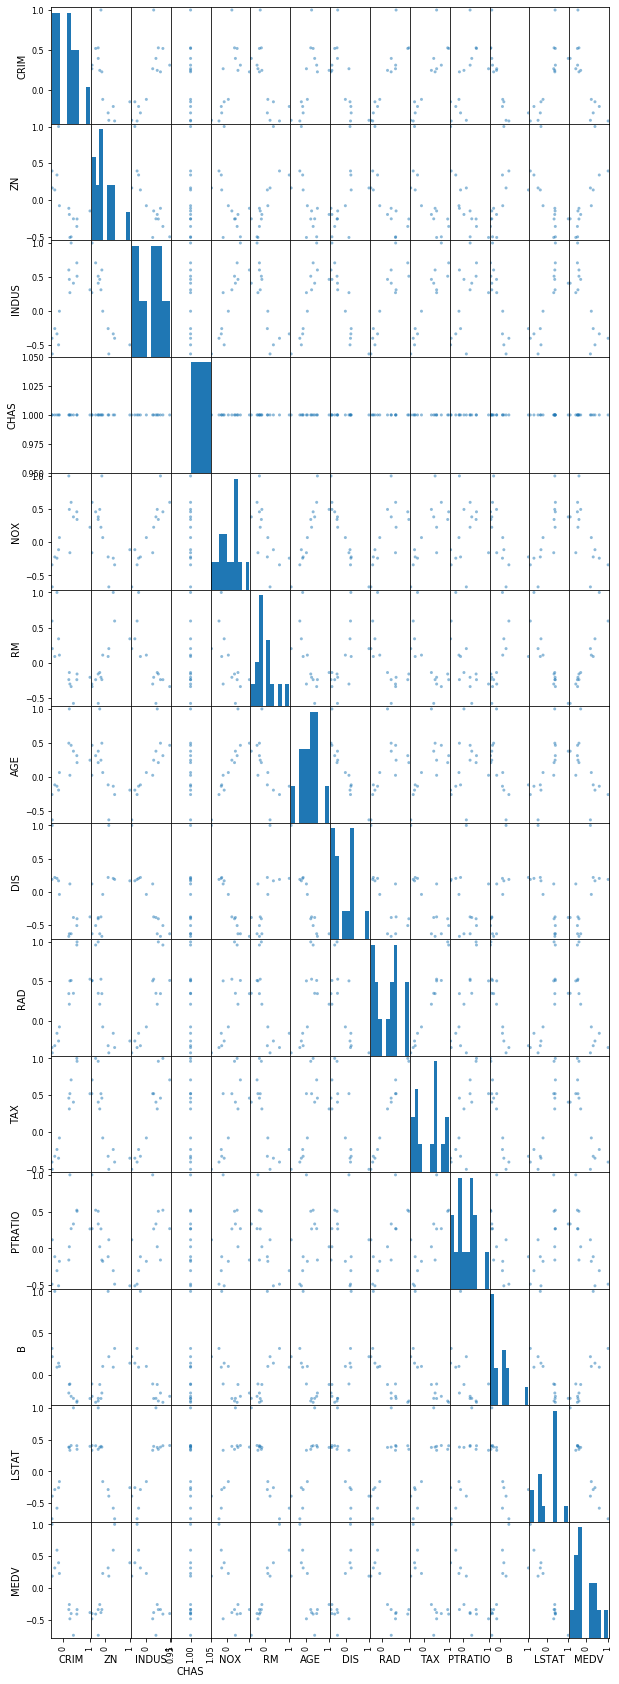

In [11]:
fig = plot_scatter_matrix(df_cr_gt_med)

#### Properties with Crime Rate less-than-or-equal to median

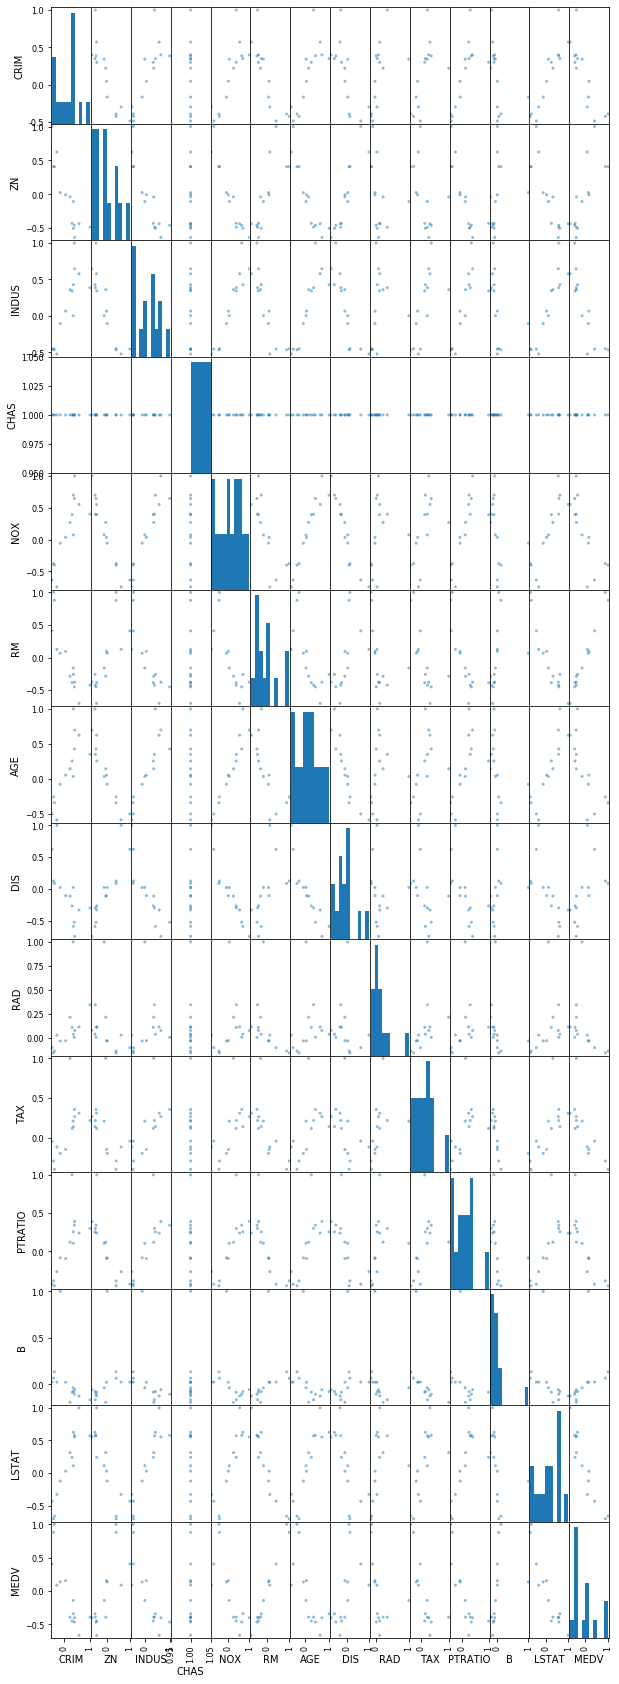

In [12]:
fig = plot_scatter_matrix(df_cr_lte_med)

## Split 3: Pupil-Teacher Ratio by Town above and less-than-or-equal to median

This is the one split that was my own choosing.  I chose this split because I believe there may be a relationship between ptratio and crime rate, for example.

### Centrality/Disbursion

#### Properties with Pupil-Teacher Ratio by Town above median

In [13]:
df_ptr_gt_med = df.loc[df['PTRATIO']>df.PTRATIO.median()]
df_ptr_gt_med.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,6.824851,3.656126,14.736759,0.031621,0.602368,6.057067,78.867194,3.093991,14.691700,509.007905,20.207115,332.365494,15.778103,18.110277
std,11.271664,13.515582,6.149274,0.175335,0.096924,0.599577,24.819764,1.918560,9.803618,179.228461,0.595776,118.207325,7.096179,7.215749
min,0.013600,0.000000,1.250000,0.000000,0.410000,3.561000,6.200000,1.129600,1.000000,188.000000,19.100000,0.320000,2.960000,5.000000
25%,0.195390,0.000000,8.140000,0.000000,0.532000,5.813000,69.500000,1.822600,4.000000,307.000000,20.200000,350.650000,10.420000,13.500000
50%,3.673670,0.000000,18.100000,0.000000,0.597000,6.072000,89.500000,2.346000,24.000000,666.000000,20.200000,389.130000,15.020000,18.200000
75%,9.329090,0.000000,18.100000,0.000000,0.693000,6.406000,97.000000,3.934200,24.000000,666.000000,20.200000,396.900000,19.770000,21.400000
max,88.976200,80.000000,27.740000,1.000000,0.770000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Properties with Pupil-Teacher Ratio by Town less-than-or-equal to median

In [14]:
df_ptr_lte_med = df.loc[df['PTRATIO']<=df.PTRATIO.median()]
df_ptr_lte_med.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,0.402196,19.071146,7.536798,0.106719,0.507023,6.512202,58.282609,4.496094,4.407115,307.466403,16.703953,380.982569,9.528024,26.955336
std,0.713617,28.072731,5.520825,0.309368,0.113802,0.725137,27.552442,2.053754,1.651199,66.402661,1.696233,39.282409,5.676872,8.841341
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.903000,2.900000,1.321600,1.000000,187.000000,12.600000,88.010000,1.730000,11.800000
25%,0.050590,0.000000,3.410000,0.000000,0.437000,6.014000,33.300000,2.889300,3.000000,264.000000,15.200000,384.300000,5.330000,21.100000
50%,0.101530,0.000000,6.090000,0.000000,0.472000,6.389000,58.700000,4.052200,5.000000,300.000000,17.400000,392.740000,8.160000,24.000000
75%,0.358090,30.000000,10.010000,0.000000,0.544000,6.951000,83.300000,6.062200,5.000000,358.000000,18.000000,395.990000,12.030000,31.600000
max,4.097400,100.000000,19.580000,1.000000,0.871000,8.725000,100.000000,12.126500,8.000000,432.000000,19.000000,396.900000,30.810000,50.000000


### Side-by-side displots (of each metric) of both for comparison

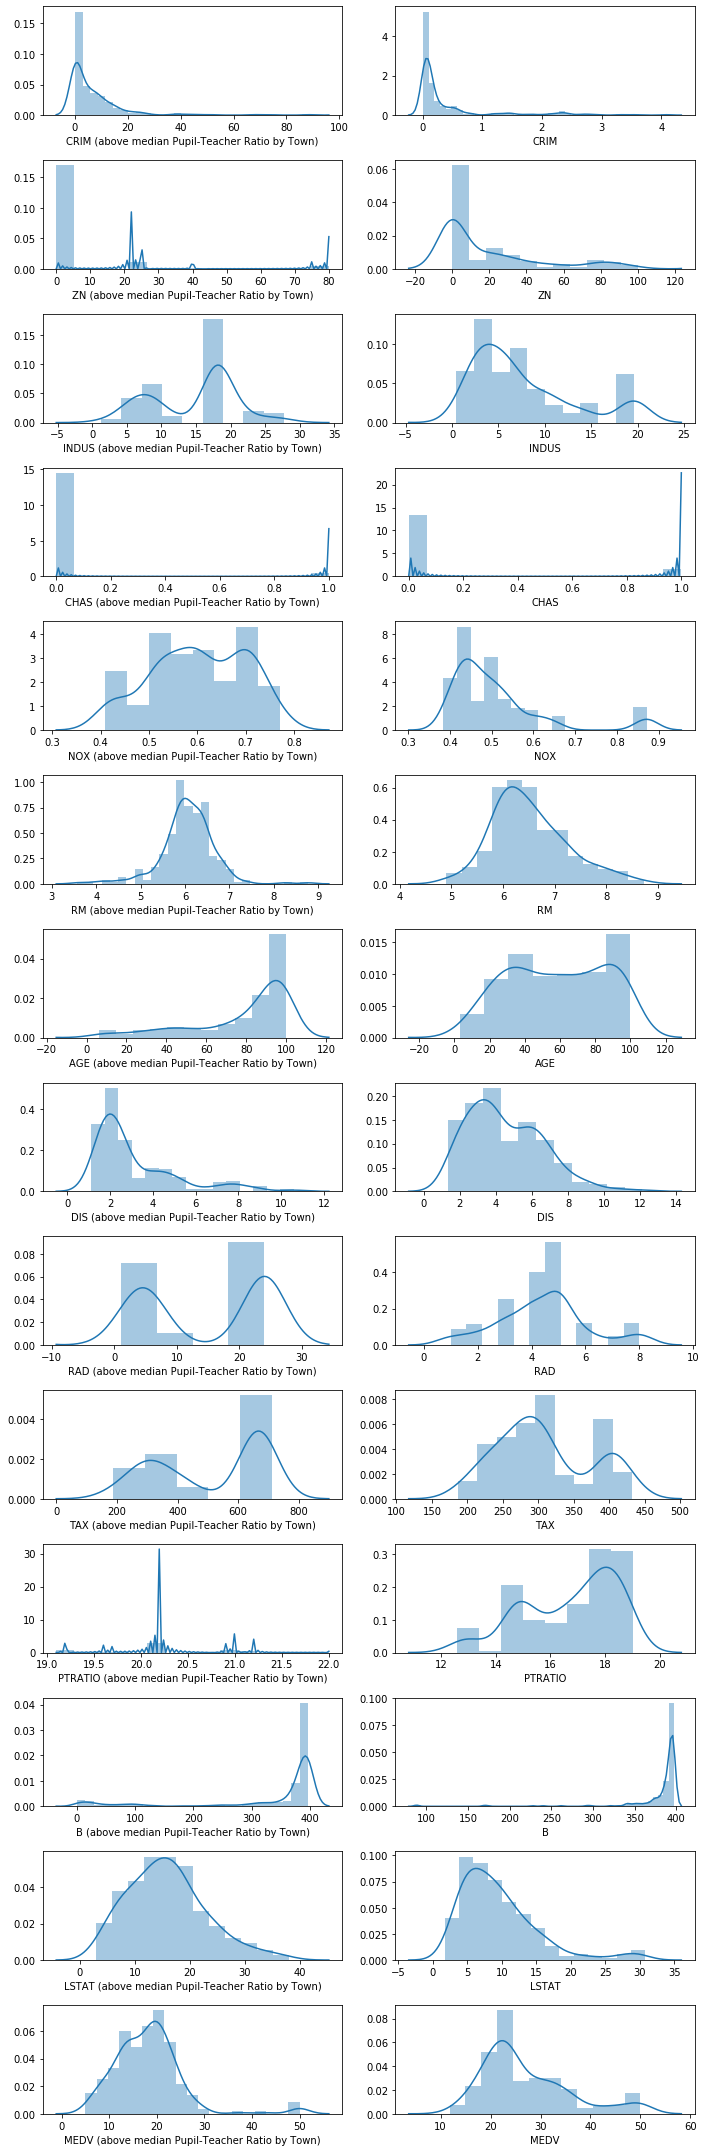

In [15]:
distplot_compare(df_ptr_gt_med, df_ptr_lte_med, "above median Pupil-Teacher Ratio by Town")

### Scattermatrix plots for comparison

#### Properties with Pupil-Teacher Ratio by Town above median

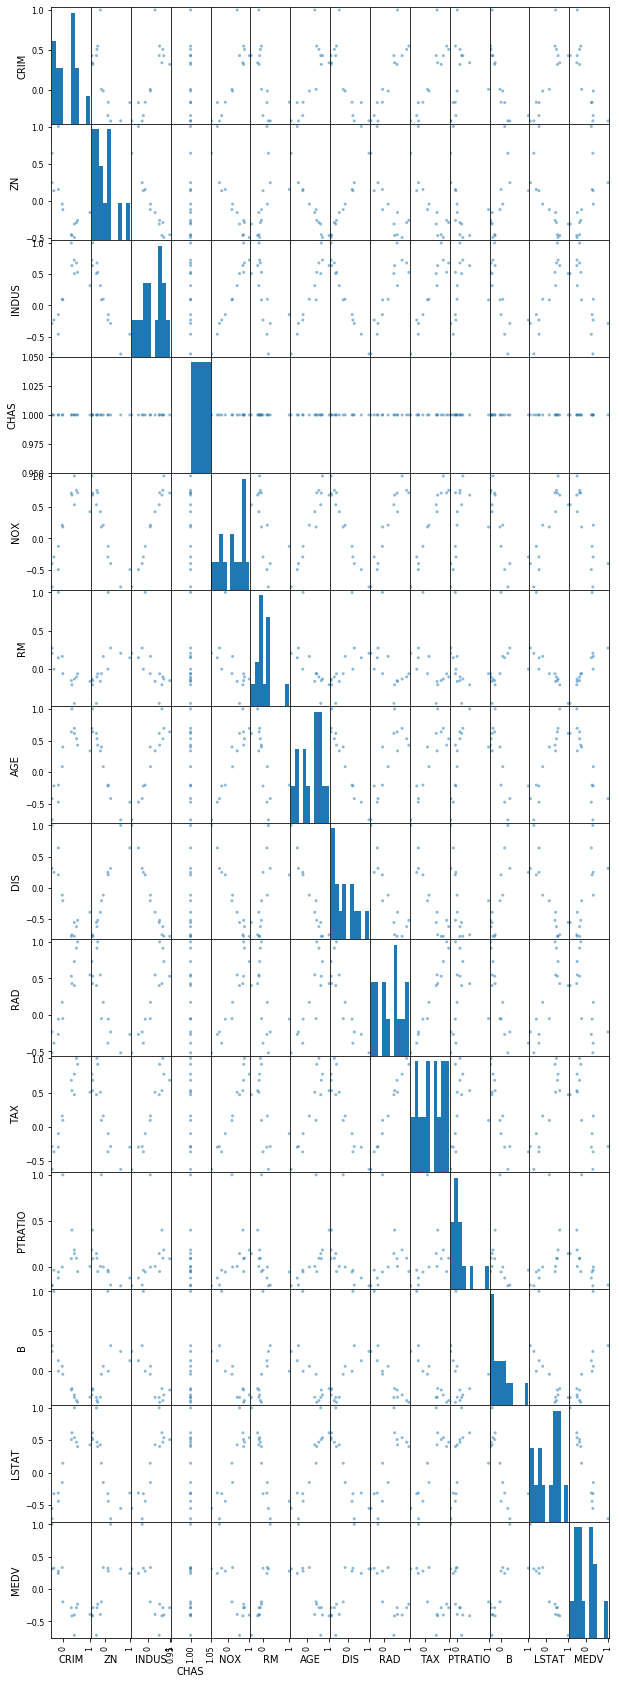

In [16]:
fig = plot_scatter_matrix(df_ptr_gt_med)

#### Properties with Pupil-Teacher Ratio by Town less-than-or-equal to median

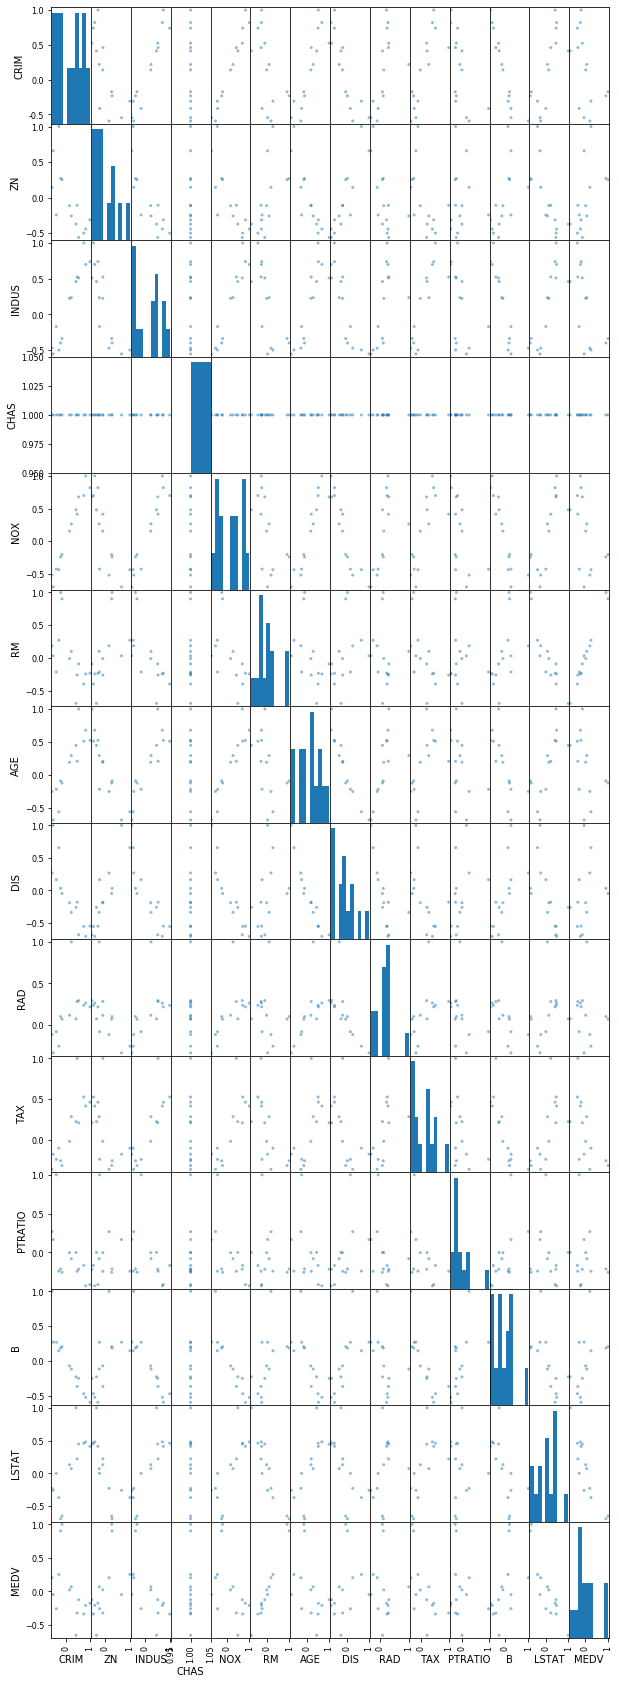

In [17]:
fig = plot_scatter_matrix(df_ptr_lte_med)

## Summary

Congratulations, you've completed your first "free form" exploratory data analysis of a popular data set!